<a href="https://colab.research.google.com/github/proxykosh/some-works/blob/main/%D0%A3%D1%87%D0%B5%D0%B1%D0%BD%D0%BE%D0%B5%20%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BD%D0%B0%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8E%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

В этом домашнем задании перед вами стоит задача научиться по фотографии лица человека предсказывать его пол, расу и возраст.



## Загрузка обученной модели

Сеть, которую мы будем дообучать мы возьмем из открытого источника: https://github.com/rcmalli/keras-vggface .

In [ ]:
!pip install git+https://github.com/DavidDoukhan/keras-vggface.git

  Cloning https://github.com/DavidDoukhan/keras-vggface.git to /tmp/pip-req-build-wgl3ifwk
  Running command git clone -q https://github.com/DavidDoukhan/keras-vggface.git /tmp/pip-req-build-wgl3ifwk
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 462 kB 57.1 MB/s 
  Created wheel for keras-vggface: filename=keras_vggface-0.6_vddk_0.1-py3-none-any.whl size=8454 sha256=c7120f0d605b2f731e65a237badfbefca9f16b9e9a02c109f0f55615541944dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-h9noczxh/wheels/99/0f/5f/e23a38bab21ffcc7d380bd2a6fef9cf285dc22e04cb61d9e67
Failed to build keras-vggface
    Running setup.py install for keras-vggface ... done
  DEPRECATION: keras-vggface was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

from keras_vggface.vggface import VGGFace

vggface = VGGFace(model='resnet50') 

165445632/165439116 [==============================] - 1s 0us/step


In [ ]:
! pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: /content/resnet50face.h5
100%|██████████| 166M/166M [00:01<00:00, 83.4MB/s]


'resnet50face.h5'

In [ ]:
from tensorflow.keras.models import load_model
vggface_model = load_model("resnet50face.h5")

In [ ]:
vggface_model.summary() 

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [ ]:
! wget https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg -O brad_pitt.jpg

--2022-05-18 11:57:54--  https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.ua (img.joinfo.ua)... 172.67.214.206, 104.21.83.52, 2606:4700:3033::6815:5334, ...
Connecting to img.joinfo.ua (img.joinfo.ua)|172.67.214.206|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg [following]
--2022-05-18 11:57:54--  https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.com (img.joinfo.com)... 104.21.73.131, 172.67.162.235, 2606:4700:3031::6815:4983, ...
Connecting to img.joinfo.com (img.joinfo.com)|104.21.73.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43154 (42K) [image/jpeg]
Saving to: ‘brad_pitt.jpg’

brad_pitt.jpg       100%[===================>]  42.14K  --.-KB/s    in 0s      

2022-05-18 11:57:54 (99.0 MB/s) - ‘brad_pitt.jpg’ saved [43154/43154]



После загрузки запустим полный пример из репозитория:

1351680/1346516 [==============================] - 0s 0us/step


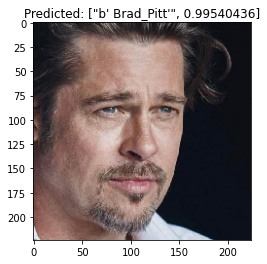

In [ ]:
from keras_vggface import utils
from tensorflow.keras.preprocessing import image

img = image.load_img("brad_pitt.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) # мы используем resnet50 -- поэтому version2. Эта функция нам еще пригодится!

preds = vggface_model.predict(x) # модель -- известная нам keras model, вызываем predict
plt.title(f"Predicted: {utils.decode_predictions(preds)[0][0]}") # используем  decode_predictions из keras_vggface
plt.imshow(img)

## Загрузка данных
Мы убедились, что модель загружена правильно, узнали какой препроцессинг ей необходим (utils.preprocess_input(x, version=2)) и теперь можем перейти к загрузке наших данных.

In [ ]:
from pathlib import Path
from collections import Counter

In [ ]:
url = 'https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk'
output = '/tmp/UTKFace.tar.gz'
gdown.download(url, output, quiet=False)
! tar -xzf /tmp/UTKFace.tar.gz -C /tmp/
url = 'https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2'
output = 'train_val_split_utk.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
To: /tmp/UTKFace.tar.gz
100%|██████████| 107M/107M [00:01<00:00, 96.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2
To: /content/train_val_split_utk.csv
100%|██████████| 1.08M/1.08M [00:00<00:00, 109MB/s]


'train_val_split_utk.csv'

In [ ]:
data_folder = Path("/tmp/UTKFace/")
filenames = list(map(lambda x: x.name, data_folder.glob('*.jpg')))
print(len(filenames))
print(filenames[:3]) # имя файла содержит возраст, индекс пола и расы, перечисленные через нижнее подчеркивание

23708
['42_0_0_20170117154803642.jpg.chip.jpg', '45_0_3_20170119195808299.jpg.chip.jpg', '1_0_2_20161219222555031.jpg.chip.jpg']


In [ ]:
# формируем датафрейм с путями и нужными классами
np.random.seed(10)
np.random.shuffle(filenames)
gender_mapping = {0: 'Male', 1: 'Female'}
race_mapping = dict(list(enumerate(('White', 'Black', 'Asian', 'Indian', 'Others'))))
age_labels, gender_labels, race_labels, correct_filenames = [], [], [], []

for filename in filenames:
    if len(filename.split('_')) != 4:
        print(f"Bad filename {filename}")
        continue

    age, gender, race, _ = filename.split('_')
    correct_filenames.append(filename)
    age_labels.append(age)
    gender_labels.append(gender)
    race_labels.append(race)
    
age_labels = np.array(age_labels, dtype=np.float32)
max_age = age_labels.max()
data = {"img_name": correct_filenames, 
        "age": age_labels / max_age, # нормализуем возраст от 0 до 1
        "race": race_labels, 
        "gender": gender_labels}
df = pd.DataFrame(data)
df.head()

Bad filename 61_1_20170109142408075.jpg.chip.jpg
Bad filename 61_1_20170109150557335.jpg.chip.jpg
Bad filename 39_1_20170116174525125.jpg.chip.jpg


,img_name,age,race,gender
0,30_0_0_20170117140008320.jpg.chip.jpg,0.258621,0,0
1,32_0_4_20170116220621484.jpg.chip.jpg,0.275862,4,0
2,30_0_0_20170117130654291.jpg.chip.jpg,0.258621,0,0
3,65_0_0_20170111201030222.jpg.chip.jpg,0.560345,0,0
4,2_0_2_20161219154627053.jpg.chip.jpg,0.017241,2,0


In [ ]:
df_split = pd.read_csv("train_val_split_utk.csv", index_col=0).set_index("img_name")
df_split.head()
df = df.set_index("img_name").join(df_split).reset_index()
df_train = df[df["is_train"] == 1]
df_val = df[df["is_train"] != 1]
print(len(df_val), len(df_train))

4759 18946


In [ ]:
def decode_labels(race_id, gender_id, age):
    return race_mapping[int(race_id)], gender_mapping[int(gender_id)], int(age*max_age)
def show_face(image, race_id, gender_id, age):
    plt.imshow(image)
    race, gender, age = decode_labels(race_id, gender_id, age)
    plt.title(f"Gender: {gender}, Race: {race}, Age: {age}")

Убедимся, что метки классов корректны:

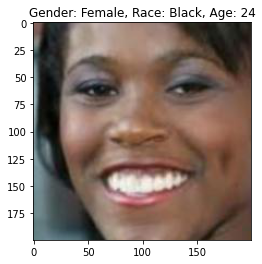

In [ ]:
row = df.iloc[np.random.randint(len(df))]
img = plt.imread(str(data_folder / row["img_name"]))
show_face(img, row["race"], row["gender"], row["age"])

Посмотрим на их распределение:

Counter({'White': 10078, 'Black': 4526, 'Indian': 3975, 'Asian': 3434, 'Others': 1692})
Counter({'Male': 12391, 'Female': 11314})


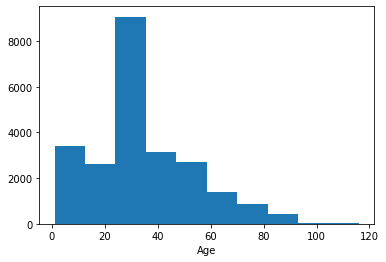

In [ ]:
races_verbose = [race_mapping[int(race)] for race in df["race"]]
genders_verbose = [gender_mapping[int(gender)] for gender in df["gender"]]
from collections import Counter
print(Counter(races_verbose))
print(Counter(genders_verbose))
_ = plt.hist(df["age"]*max_age)
_ = plt.xlabel("Age")

## Задание 2. Создание генератора данных для модели предсказания пола.
Предподготовка закончена. А теперь ваша очередь:) Мы начнем с создания модели предсказания пола. В этом задании вы должны реализовать генератор данных необходимый для последущего обучения модели. Мы предлагаем вам воспользоваться `tensorflow.keras.preprocessing.image.ImageDataGenerator`

###a) 
**Создайте генератор image_gen типа ImageDataGenerator с корректным препроцессингом, соответствующем keras_vggface.** Аугментацию использовать не нужно. 

Какой препроцессинг корректный? Как мы знаем, перед применением обученных сетей нужно знать какой препроцессинг они проводят с данными. Т.к. эта модель не часть Keras, мы должны ответить на этот вопрос сами с помощью исходников автора этой сети. К счастью, он приводит пример использования на главной странице репозитория. Видно, что он использует функцию preprocess_input из utils. Значит ей мы и должны воспользоваться!

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input_facenet(image_):
    """
    image_ -- тензор размера (1, H, W, 3)
    
    return: картинка, с примененным preprocess_input(..., version=2) из keras_vggface (см пример с Бредом Питом)
    """
    # < YOUR CODE STARTS HERE >
    
    preprocessed = utils.preprocess_input(image_, version=2)
    
    # < YOUR CODE ENDS HERE >
    return preprocessed

# < YOUR CODE STARTS HERE >
# image_gen должен содержать ImageDataGenerator с правильной preprocessing_function

image_gen = ImageDataGenerator(preprocessing_function = preprocess_input_facenet) 

# < YOUR CODE ENDS HERE >

###b)

Для генерации картинок раньше мы использовали `image_gen.flow_from_folder`. Но для этого данные должны быть расположены на диске с определенной структурой папок, что в данном случае не очень удобно. Поэтому вы должны воспользоваться более гибким `image_gen.flow_from_dataframe`, который позволяет генерировать данные с нужными классами используя датафрейм (мы его создали выше для вас).

**Ознакомьтесь с документацией по [ссылке](https://keras.io/preprocessing/image/) (раздел flow_from_dataframe) и создайте train_generator и val_generator для df_train и df_val соответственно.**
*  Генератор должен возвращать картинку и ее класс (male/female)
*  class_mode укажите "binary", directory=str(data_folder)
*  batch_size, image_size указаны ниже
*  train_generator должен перемешивать данные, а val_generator -- не должен
*  После выполнения клетки ниже вы должны увидеть текст: *Found 18946 validated image filenames belonging to 2 classes.
Found 4759 validated image filenames belonging to 2 classes.*




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 128
IMAGE_SIZE = 224
# < YOUR CODE STARTS HERE >
# train_generator = image_gen.flow_from_dataframe( ... ), 
# val_generator = image_gen.flow_from_dataframe( ... )

train_generator = image_gen.flow_from_dataframe(df_train,directory=str(data_folder), x_col="img_name", y_col="gender", target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='rgb', 
                                                 class_mode= "binary", batch_size=BATCH_SIZE, shuffle=True)




val_generator = image_gen.flow_from_dataframe(df_val, directory=str(data_folder), x_col="img_name", y_col="gender",  target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='rgb', 
                                                 class_mode= "binary", batch_size=BATCH_SIZE, shuffle=False)




# < YOUR CODE ENDS HERE >

Found 18946 validated image filenames belonging to 2 classes.
Found 4759 validated image filenames belonging to 2 classes.


In [ ]:
sample_images, sample_labels = next(val_generator)
assert sample_images.shape == (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3), "Неправильный размер батча"
assert sample_labels.shape == (BATCH_SIZE,), "Неправильный размер меток класса"
assert list(sorted(np.unique(sample_labels))) == [0., 1.], "Ожидаемые классы 0 и 1"
print("Simple tests passed")

Simple tests passed


Попробуем отобразить картинку и ее лейбл для проверки генерации:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Male


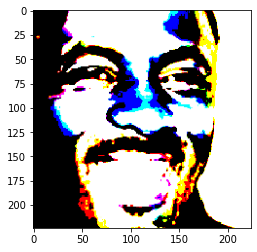

In [ ]:
plt.imshow(sample_images[100])
print(gender_mapping[int(sample_labels[100])])
# мы получим очень странное изображение и это нормально. 
# matplotlib ожидает картинку с интесивностями от 0 до 1 если она типа float и от 0 до 255 если int.

In [ ]:
print(sample_images[100].max(), sample_images[100].min()) # можно увидеть что значения яркостей типа float и в т.ч. отрицательные

162.5047 -126.0912


###с)
**Реализуйте функцию `deprocess_image`, которая преобразует картинку исользуемую keras_vggface обратно к изображению, которое можно визуализировать с помощью `matplotlib`.**
*  вам понадобится https://github.com/rcmalli/keras-vggface/blob/master/keras_vggface/utils.py
*  необходимо проделать операции preprocess_input в обратном порядке
*  наш случай: version=2, format="channels_last"

Female


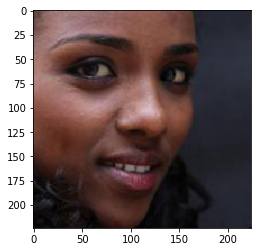

In [ ]:
def deprocess_image(vggface_image):
    """
    vggface_image -- (H, W, 3) картинка после препросессинга. 
    содержит отрицательные значения и некорректно отображается matplotlib

    return: корректно отображаеая картинка типа np.uint8(!!). 

    ! работайте с копией картинки (image = np.copy(vggface_image)) !
    """
    # < YOUR CODE STARTS HERE >
    image = np.copy(vggface_image)

    
    image[..., 0] += 91.4953
    image[..., 1] += 103.8827
    image[..., 2] += 131.0912
    image = image[..., ::-1]
    
    
    # < YOUR CODE ENDS HERE >
    return image.astype(np.uint8)

# теперь картинка должна отображаться корректно
plt.imshow(deprocess_image(sample_images[5]))
print(gender_mapping[int(sample_labels[5])])

##Здание 3. Обучение модели предсказания пола

В этом задании вы должны обучить модель предсказания пола с точностью более 90% на валидационном сете. 

*   Возьмите за основу 'base_model' (определена ниже)
*   Вы должны сами решить сколько слоев замораживать и сколько полносвзяных слоев использовать. Рекомендуем начинать с модели с меньшим числом обучаемых параметров.
*   Используйте чекпоинты, чтобы не потерять веса лучшей модели. Они должны быть сохранены с именем "model_gender/checkpoint_best.h5"
*   Рекомендуется в model.fit(...) использовать steps_per_epoch=25, для того чтобы проверка на валидации происходила чаще и вы могли более точно отслеживать прогресс. Полная эпоха ~140 итераций.
*   За точность выше 94% -- дополнительные баллы.



In [ ]:
# для начала "отрежем" от vggface_model последний слой классификатора 
# теперь для картинки base_model предсказывает 2048-мерный вектор признаков.

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                           

In [ ]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

In [ ]:
from google.colab import drive
from pathlib import Path
callback = tf.keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Skillbox/model_gender/best_checkpoint.hdf5",
    monitor="val_accuracy",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None,

)
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# < YOUR CODE STARTS HERE >

mod = tf.keras.models.Sequential()
mod.add(base_model)
mod.add(tf.keras.layers.Dense(1024, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(512, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(128, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(16, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(learning_rate=0.004)
mod.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
# Обучение модели предсказания пола
mod.fit(train_generator, callbacks = callback, steps_per_epoch=25,
          batch_size=32, epochs = 5, validation_data = val_generator)

Epoch 1/5
25/25 [==============================] - 28s 1s/step - loss: 0.1270 - accuracy: 0.9550 - val_loss: 0.1905 - val_accuracy: 0.9342
Epoch 2/5
25/25 [==============================] - 24s 980ms/step - loss: 0.1211 - accuracy: 0.9500 - val_loss: 0.1583 - val_accuracy: 0.9376
Epoch 3/5
25/25 [==============================] - 24s 984ms/step - loss: 0.1353 - accuracy: 0.9456 - val_loss: 0.1672 - val_accuracy: 0.9374
Epoch 4/5
25/25 [==============================] - 25s 1s/step - loss: 0.1370 - accuracy: 0.9447 - val_loss: 0.1651 - val_accuracy: 0.9407
Epoch 5/5
25/25 [==============================] - 25s 1s/step - loss: 0.1325 - accuracy: 0.9431 - val_loss: 0.1789 - val_accuracy: 0.9313


In [ ]:
# < YOUR CODE ENDS HERE >

In [ ]:
model_gender = load_model("/content/drive/My Drive/Skillbox/model_gender/best_checkpoint.hdf5")
loss, acc = model_gender.evaluate(val_generator)
if acc < 0.9:
    print("Please, try harder!")
else:
    if acc >= 0.94:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

38/38 [==============================] - 16s 380ms/step - loss: 0.1789 - accuracy: 0.9313
Very good! Can you improve accuracy?


In [ ]:
#@title (вспомогательный код, выполните клетку)
def show_faces(images, real_race=None, real_gender=None, real_age=None, 
               predicted_race=None, predicted_gender=None, predicted_age=None):
    plt.figure(figsize=(10,10))
    labels = {"Gender": [predicted_gender, real_gender],
                  "Race": [predicted_race, real_race],
                  "Age": [predicted_age, real_age]}
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(deprocess_image(images[i]))
        real_str = "Real:"
        pred_str = "Pred:"
        correct = True
        for name, (predicted, real) in labels.items():
            if predicted is None:
                continue
            if name == "Age":
                real_age = int(real[i]*int(max_age))
                predicted_age = int(predicted[i]*max_age)
                real_str += f"{real_age}"
                pred_str += f"{predicted_age}"
                if np.abs(predicted_age - real_age) > 6:
                    correct = False

            elif name == "Gender":
                real_gender = int(real[i])
                predicted_gender = int(predicted[i] > 0.5)
                real_str += f"{gender_mapping[real_gender]}, "
                pred_str += f"{gender_mapping[predicted_gender]}, "
                if real_gender != predicted_gender:
                    correct = False
            elif name == "Race":
                real_race = int(real[i])
                predicted_race = np.argmax(predicted[i])
                real_str += f"{race_mapping[real_race]}, "
                pred_str += f"{race_mapping[predicted_race]}, "
                if real_race != predicted_race:
                    correct = False
                
        title_obj = plt.title(f"{real_str}\n{pred_str}")
            
        plt.subplots_adjust(wspace=0.4)
        if not correct:
            plt.setp(title_obj, color='r')
        

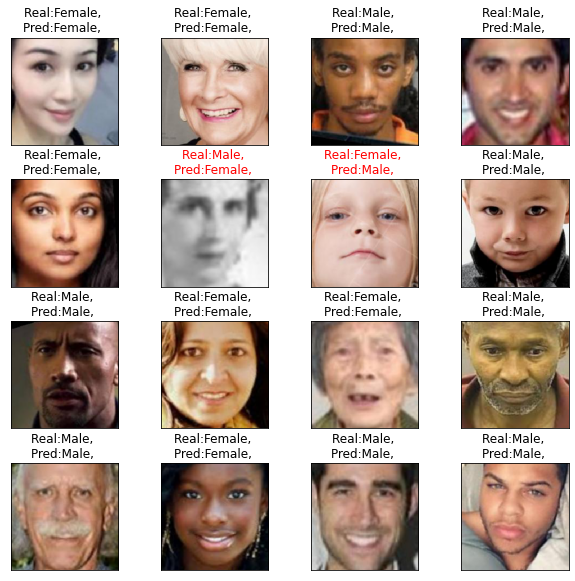

In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_gender.predict(sample_validation_images)
show_faces(sample_validation_images, real_gender=sample_validation_labels, predicted_gender=predicted)

##Здание 4. Обучение модели предсказания расы

В этом задании вы должны обучить модель предсказания расы с точностью более 80% на валидационном сете. 

*   Используя код аналогичный тому, что выше, реализуйте модель предсказания расы
*   Для начала определите генератор данных
    *  нужно указать class_mode="sparse" и изменить "y_col"
*   Используйте чекпоинты, чтобы не потерять веса лучшей модели. Они должны быть сохранены с именем "model_race/checkpoint_best.h5"
*   За точность выше 85% -- дополнительные баллы.



In [ ]:
vggface_model = load_model("resnet50face.h5")
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

In [ ]:
# < YOUR CODE STARTS HERE >
train_generator = image_gen.flow_from_dataframe(df_train,directory=str(data_folder), x_col="img_name", y_col="race", target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='rgb', 
                                                 class_mode= "sparse", batch_size=BATCH_SIZE, shuffle=True)




val_generator = image_gen.flow_from_dataframe(df_val, directory=str(data_folder), x_col="img_name", y_col="race",  target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='rgb', 
                                                 class_mode= "sparse", batch_size=BATCH_SIZE, shuffle=False)

callback = tf.keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Skillbox/model_rase1/best_checkpoint.hdf5",
    monitor="val_accuracy",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None,

)

mod = tf.keras.models.Sequential()
mod.add(base_model)
mod.add(tf.keras.layers.Dense(1024, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(512, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(128, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(16, activation='relu'))
mod.add(tf.keras.layers.BatchNormalization())
mod.add(tf.keras.layers.Dense(5, activation='softmax'))

adam = tf.keras.optimizers.Adam(learning_rate=0.004)
mod.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Found 18946 validated image filenames belonging to 5 classes.
Found 4759 validated image filenames belonging to 5 classes.


In [ ]:
# Обучение модели предсказания расы
mod.fit(train_generator, callbacks = callback, steps_per_epoch=25,
          batch_size=32, epochs = 25, validation_data = val_generator)

Epoch 1/25
25/25 [==============================] - 29s 1s/step - loss: 0.6332 - accuracy: 0.8128 - val_loss: 1.7736 - val_accuracy: 0.8142
Epoch 2/25
25/25 [==============================] - 25s 1s/step - loss: 0.4331 - accuracy: 0.8594 - val_loss: 1.2685 - val_accuracy: 0.8399
Epoch 3/25
25/25 [==============================] - 25s 996ms/step - loss: 0.4223 - accuracy: 0.8772 - val_loss: 0.7925 - val_accuracy: 0.8590
Epoch 4/25
25/25 [==============================] - 24s 974ms/step - loss: 0.3750 - accuracy: 0.8869 - val_loss: 0.5735 - val_accuracy: 0.8678
Epoch 5/25
25/25 [==============================] - 24s 982ms/step - loss: 0.3642 - accuracy: 0.8853 - val_loss: 0.5030 - val_accuracy: 0.8636
Epoch 6/25
25/25 [==============================] - 24s 978ms/step - loss: 0.3471 - accuracy: 0.8903 - val_loss: 0.5024 - val_accuracy: 0.8704
Epoch 7/25
25/25 [==============================] - 25s 1s/step - loss: 0.3413 - accuracy: 0.8884 - val_loss: 0.4780 - val_accuracy: 0.8764
Epoch 8/

In [ ]:
# < YOUR CODE ENDS HERE >

In [ ]:
model_race = load_model("/content/drive/My Drive/Skillbox/model_rase/best_checkpoint.hdf5")
loss, acc = model_race.evaluate(val_generator)
if acc < 0.8:
    print("Please, try harder!")
else:
    if acc >= 0.85:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

38/38 [==============================] - 14s 351ms/step - loss: 0.8722 - accuracy: 0.8653
Well done!


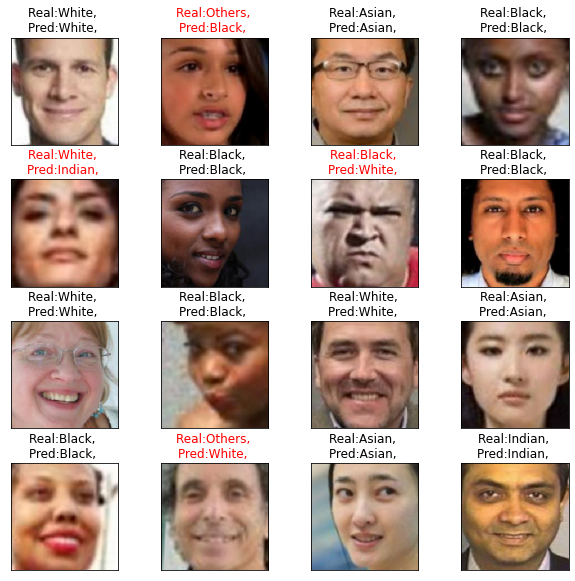

In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_race.predict(sample_validation_images)

show_faces(sample_validation_images, real_race=sample_validation_labels, predicted_race=predicted)

## Задание 5. Multitask learning

В этом задании мы могли бы обучить регрессор возраста по картинке, используя аналогичный уже написаному код. Но вы пойдем по другому пути. 

Если на каждый атрибут (возраст, раса, пол) создавать одну модель, то таких моделей получится 3. Очевидно, что для предсказания на новой картике необходимо будет произвести инференс трех сетей. Это может быть ресурсо-затратно и сложнее в поддержке. 

Какой же есть еще подход? Он называется Multitask learning. Его идея в том, чтобы обучать одну модель для решения сразу нескольких задач! Гибкость нейронных сетей позволяет это сделать достаточно логичными образом. Необходимо вместо одной "головы" для предсказания сделать несколько. Таким образом в нашей задаче одна будет отвечать за классификацию пола (1 выход, вероятность), вторая -- за классификацию расы (5 выходов, вероятности) и третья -- за предсказания возраста (1 выход, число).

### a) 
**Реализуйте модель сети с тремя "головами".**

*    Вам нужно вспомнить что такое Functional API для определения моделей, потому что необходимо определить архитектуру с тремя выходами. С помощью Sequential API этого сделать нельзя.
*    За основу возьмите base_model (определена ниже), добавьте к ее выходу 1-2 полносвязных слоя (количество нейронов определите сами)
*    К последнему слою добавьте три паралельных выхода: два с одним нейроном и один с пятью
*    При определении выходных слоев обязательно укажите Dense(..., name="race"/"age"/"gender" )
*    Не забудьте про правильные активации. Т.к. возраст у нас нормирован (от 0 до 1), подумайте, какая активация ему подойдет
*    Порядок выходов модели: `outputs=[gender_output, race_output, age_output]`
*    Точность предсказания пола должна быть > 90%, расы > 80% а MAE для возраста < 0.09.

In [ ]:
vggface_model = load_model("resnet50face.h5")
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_5 (Functional)           (None, 2048)         23561152    ['img[0][0]']                    
                                                                                                  
 dense_32 (Dense)               (None, 32)           65568       ['model_5[1][0]']                
                                                                                                  
 batch_normalization_26 (BatchN  (None, 32)          128         ['dense_32[0][0]']         

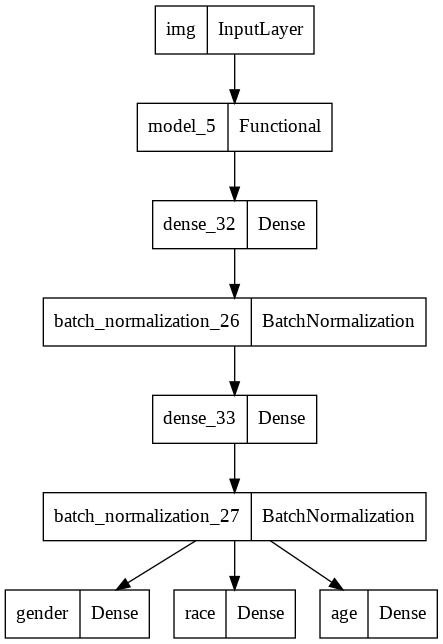

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model


encoder_input = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name="img")
x = base_model(encoder_input)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output_gender = tf.keras.layers.Dense(1, activation='sigmoid', name = 'gender')(x)
output_race = tf.keras.layers.Dense(5, activation='softmax', name = 'race')(x)
output_age = tf.keras.layers.Dense(1, activation='sigmoid', name = 'age')(x)

input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
model = tf.keras.Model(
    inputs= encoder_input,
    outputs=[output_gender, output_race, output_age],
)
# < YOUR CODE STARTS HERE >
# переменная model должна содержать модель для дальнейшего обучения









# < YOUR CODE ENDS HERE >
model.summary()
plot_model(model)


In [ ]:
prediction = model(np.zeros((6, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32))
assert len(prediction) == 3, "Модель должна возвращать три тензора"
assert prediction[0].shape == (6, 1), f"Неправильный размер выхода gender: {prediction[0].shape}"
assert prediction[1].shape == (6, 5), f"Неправильный размер выхода race: {prediction[1].shape}"
assert prediction[2].shape == (6, 1), f"Неправильный размер выхода age: {prediction[2].shape}"
print("Shape tests passed")

Shape tests passed


Ниже мы приводим необходимые генераторы данных. Обратите внимание на y_col и class_mode.


In [ ]:
train_generator = image_gen.flow_from_dataframe(
        dataframe=df_train,
        class_mode="multi_output",
        x_col="img_name", y_col=["gender", "race", "age"], # нас интересуют все три столбца
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="multi_output",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
def split_outputs(generator):
    """
    Вспомогательная функция, которая модернизирует генераторы картинок, чтобы их
    можно было использовать для Мultitask
    image_gen.flow_from_dataframe возвращает на каждой итерации батч:
    ((N, H, W, 3), (N, 3)) -- N картинок и N троек меток (для трех "задач")
    model.fit(..) ожидает генератор в формате:
    ((N, H, W, 3), [(N, 1), (N, 1), (N, 1)])

    Для такого превращения и нужна эта функция.

    """
    while True:
        data = next(generator)
        image = data[0]
        labels = [output_labels.astype(float) for output_labels in data[1]]
        yield image, labels

Found 18946 validated image filenames.
Found 4759 validated image filenames.


А теперь перейдем к обучению:

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # вы можете выбрать другую скорость обучения для вашей модели

# обратите внимание, что теперь loss -- это словарь, в котором к каждому выходу мы "прицепляем" свой лосс
# аналогично с metrics
model.compile(optimizer=optimizer, 
              loss={'gender': 'binary_crossentropy', 'race': 'sparse_categorical_crossentropy', 'age': 'mse'},
              metrics={'gender': 'accuracy', 'race': 'accuracy', 'age': 'mae'})

path = Path("model_multitask")
path.mkdir(exist_ok=True)
cpt_filename = "checkpoint_best.h5"
cpt_path =str(path / cpt_filename)

callback = tf.keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Skillbox/model_multi/best_checkpoint.hdf5",
    monitor="val_accuracy",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None,

)
model.fit_generator(split_outputs(train_generator), epochs=15, validation_data=split_outputs(val_generator),
                    callbacks=callback, steps_per_epoch=50, 
                    validation_steps= len(df_val) // BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
50/50 [==============================] - 77s 2s/step - loss: 0.4067 - gender_loss: 0.1344 - race_loss: 0.2630 - age_loss: 0.0093 - gender_accuracy: 0.9508 - race_accuracy: 0.9102 - age_mae: 0.0744 - val_loss: 0.5728 - val_gender_loss: 0.1511 - val_race_loss: 0.4114 - val_age_loss: 0.0103 - val_gender_accuracy: 0.9419 - val_race_accuracy: 0.8706 - val_age_mae: 0.0785
Epoch 2/15
50/50 [==============================] - 32s 641ms/step - loss: 0.4094 - gender_loss: 0.1133 - race_loss: 0.2873 - age_loss: 0.0089 - gender_accuracy: 0.9594 - race_accuracy: 0.9047 - age_mae: 0.0725 - val_loss: 0.5725 - val_gender_loss: 0.1565 - val_race_loss: 0.4073 - val_age_loss: 0.0087 - val_gender_accuracy: 0.9434 - val_race_accuracy: 0.8763 - val_age_mae: 0.0718
Epoch 3/15
50/50 [==============================] - 35s 708ms/step - loss: 0.4032 - gender_loss: 0.1299 - race_loss: 0.2649 - age_loss: 0.0084 - gender_accuracy: 0.9504 - race_accuracy: 0.9127 - age_mae: 0.0715 - val_loss: 0.5723 - val_g

In [ ]:
model_multitask = load_model("/content/drive/My Drive/Skillbox/model_multi/best_checkpoint.hdf5")
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="multi_output",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
results = model_multitask.evaluate(split_outputs(val_generator), steps=len(df_val)//BATCH_SIZE)
assert results[-3] > 0.90, f"Gender accuracy is too low. Please try to improve it {results[-3]}"
assert results[-2] > 0.80, f"Race accuracy is too low. Please try to improve it. {results[-2]}"
assert results[-1] < 0.09, f"Age MAE it too high: {results[-1]}"
print("Well done!")

Found 4759 validated image filenames.
37/37 [==============================] - 14s 345ms/step - loss: 0.6407 - gender_loss: 0.1585 - race_loss: 0.4737 - age_loss: 0.0085 - gender_accuracy: 0.9413 - race_accuracy: 0.8682 - age_mae: 0.0701
Well done!


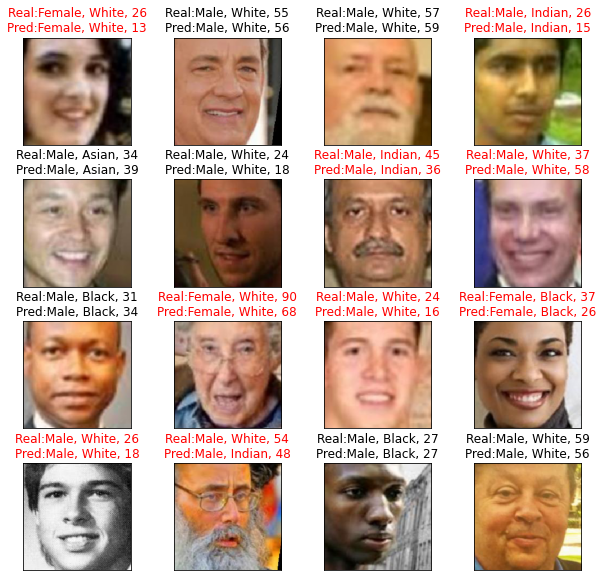

In [ ]:
sample_validation_images, sample_validation_labels = next(split_outputs(val_generator))
predicted = model_multitask.predict(sample_validation_images)
show_faces(sample_validation_images, 
           real_gender=sample_validation_labels[0], predicted_gender=predicted[0],
           real_race=sample_validation_labels[1], predicted_race=predicted[1],
           real_age=sample_validation_labels[2].flatten(), predicted_age=predicted[2].flatten(),
           )

###b)
Загрузите любое лицо и получите предсказание. Не забудьте его обрезать соответствующим образом. Результат сети не оценивается.

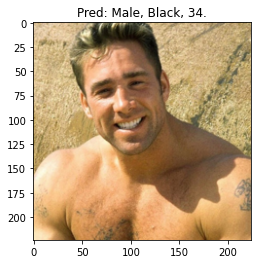

In [ ]:
import io
import requests
from PIL import Image
r = requests.get('https://sun9-29.userapi.com/impg/6i3JwAa5X_-h5UYGz2hR_4CwlAIQTBIWOdatjA/V2RMNRaozE8.jpg?size=604x591&quality=96&sign=26568a01f7f75860f00d85a651afdc28&type=album', stream=True)
x = np.array(Image.open(io.BytesIO(r.content)).resize((224,224)))
img = x.copy()
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) 
predicted_labels = model_multitask.predict(x)
plt.imshow(img)
gender, race, age = int(predicted_labels[0][0] > 0.5), np.argmax(predicted_labels[1][0]), predicted_labels[2][0]
title_obj = f"Pred: {gender_mapping[gender]}, {race_mapping[race]}, {int(age[0]*max_age)}."
_ = plt.title(title_obj)
# я получился немного моложе :)

#Заключение 

Это было очень сложное и важное домашнее задание. Надеемся, вы с ним справились успешно и готовы к переходу к следующему модулю! Удачи!